# **Importing Libraries and Dependencies**

In [ ]:
!python -m spacy download en --quiet
!git clone "https://github.com/anoopkunchukuttan/indic_nlp_library"
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git
INDIC_NLP_LIB_HOME=r"/content/indic_nlp_library"
INDIC_NLP_RESOURCES="/content/indic_nlp_resources"

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
import spacy
import random
import string
import csv
import sys
sys.path.append(r'{}'.format(INDIC_NLP_LIB_HOME))

from indicnlp import common
common.set_resources_path(INDIC_NLP_RESOURCES)


from indicnlp import common
common.set_resources_path(INDIC_NLP_RESOURCES)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
Cloning into 'indic_nlp_library'...
remote: Enumerating objects: 1271, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 1271 (delta 50), reused 54 (delta 25), pack-reused 1178
Receiving objects: 100% (1271/1271), 9.56 MiB | 17.14 MiB/s, done.
Resolving deltas: 100% (654/654), done.
Cloning into 'indic_nlp_resources'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 133 (delta 0), reused 2 (delta 0), pack-reused 126
Receiving objects: 100% (133/133), 149.77 MiB | 31.54 MiB/s, done.
Resolving deltas: 100% (51/51), done.


# **Mounting Google Drive**

In [ ]:
from google.colab import drive                       
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading data and Preprocessing**

In [ ]:
# reading the dataset from google drive                     

with open('/content/drive/MyDrive/AssignmentNLP/train/train.csv', newline='') as f:
    reader = csv.reader(f)
    raw_data = list(reader)




In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")             #setting device as GPU if available, else device -> CPU


In [ ]:
train_data=raw_data

In [ ]:
for i in range(0,10):
  print(train_data[i])

['', 'hindi', 'english']
['0', 'एल सालवाडोर मे, जिन दोनो पक्षों ने सिविल-युद्ध से वापसी ली, उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।', "In El Salvador, both sides that withdrew from their civil war took moves that had been proven to mirror a prisoner's dilemma strategy."]
['1', 'मैं उनके साथ कोई लेना देना नहीं है.', 'I have nothing to do with them.']
['2', '-हटाओ रिक.', 'Fuck them, Rick.']
['3', 'क्योंकि यह एक खुशियों भरी फ़िल्म है.', "Because it's a happy film."]
['4', 'The thought reaching the eyes...', 'The thought reaching the eyes...']
['5', 'मैंने तुमे School से हटवा दिया .', 'I got you suspended.']
['6', 'यह Vika, एक फूल है.', "It's a flower, Vika."]
['7', 'पर मेरे लिए उसका यहुदी विरोधी होना उसके कार्यों को और भी प्रशंसनीय बनाता है क्योंकि उसके पास भी पक्षपात करने के वही कारण थे जो बाकी फौजियों के पास थे पर उसकी सच जानने और उसे बनाए रखने की प्रेरणा सबसे ऊपर थी', 'But personally, for me, the fact that Picquart was anti-Semitic actually makes his actions more admir

In [ ]:
train_data=train_data[1:]             #removing header
for i in range(0,10):
  print(train_data[i])
for i in range(0, len(train_data)):               #extracting the (hindi,english) from the two-dimensional list read from the train.csv file
  train_data[i]=train_data[i][1:]



['0', 'एल सालवाडोर मे, जिन दोनो पक्षों ने सिविल-युद्ध से वापसी ली, उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।', "In El Salvador, both sides that withdrew from their civil war took moves that had been proven to mirror a prisoner's dilemma strategy."]
['1', 'मैं उनके साथ कोई लेना देना नहीं है.', 'I have nothing to do with them.']
['2', '-हटाओ रिक.', 'Fuck them, Rick.']
['3', 'क्योंकि यह एक खुशियों भरी फ़िल्म है.', "Because it's a happy film."]
['4', 'The thought reaching the eyes...', 'The thought reaching the eyes...']
['5', 'मैंने तुमे School से हटवा दिया .', 'I got you suspended.']
['6', 'यह Vika, एक फूल है.', "It's a flower, Vika."]
['7', 'पर मेरे लिए उसका यहुदी विरोधी होना उसके कार्यों को और भी प्रशंसनीय बनाता है क्योंकि उसके पास भी पक्षपात करने के वही कारण थे जो बाकी फौजियों के पास थे पर उसकी सच जानने और उसे बनाए रखने की प्रेरणा सबसे ऊपर थी', 'But personally, for me, the fact that Picquart was anti-Semitic actually makes his actions more admirable, because he had the 

In [ ]:
for i in range(0,10):
  print(train_data[i])

['एल सालवाडोर मे, जिन दोनो पक्षों ने सिविल-युद्ध से वापसी ली, उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।', "In El Salvador, both sides that withdrew from their civil war took moves that had been proven to mirror a prisoner's dilemma strategy."]
['मैं उनके साथ कोई लेना देना नहीं है.', 'I have nothing to do with them.']
['-हटाओ रिक.', 'Fuck them, Rick.']
['क्योंकि यह एक खुशियों भरी फ़िल्म है.', "Because it's a happy film."]
['The thought reaching the eyes...', 'The thought reaching the eyes...']
['मैंने तुमे School से हटवा दिया .', 'I got you suspended.']
['यह Vika, एक फूल है.', "It's a flower, Vika."]
['पर मेरे लिए उसका यहुदी विरोधी होना उसके कार्यों को और भी प्रशंसनीय बनाता है क्योंकि उसके पास भी पक्षपात करने के वही कारण थे जो बाकी फौजियों के पास थे पर उसकी सच जानने और उसे बनाए रखने की प्रेरणा सबसे ऊपर थी', 'But personally, for me, the fact that Picquart was anti-Semitic actually makes his actions more admirable, because he had the same prejudices, the same reasons to be 

In [ ]:
print(len(train_data))

102322


In [ ]:
def standardize(s):                                    # this function is used to standardize the string i.e remove extra extra outer whitespaces, change to lowercase, remove most punctuation marks
  s=s.strip()
  s=s.lower()
  norm_s=""
  ignore=string.punctuation                           # this gives all punctuations
  for i in s:
    #if i=='!' or i=='.' or i=='?' or i==',' or i=='"' or i=="," or i==';' or i==':':
    if i in ignore:                                                          
      continue
    else:
      norm_s=norm_s+i

  return norm_s                                   # returns the staandardized string

    


# **Defining Tokenizers for English (spacy) and Hindi (Indic NLP)**

In [ ]:
from indicnlp.tokenize import indic_tokenize  

indic_string='सुनो, कुछ आवाज़ आ रही है। फोन?'

print('Input String: {}'.format(indic_string))
print('Tokens: ')
for t in indic_tokenize.trivial_tokenize(indic_string):          # Inddic NLP tokenizer function()
    print(t)

print(indic_tokenize.trivial_tokenize(indic_string))

def tokenize_hindi(text):                      #tokenizer for hindi using Indic NLP
  return indic_tokenize.trivial_tokenize(text)

sample_text = 'सुनो, कुछ आवाज़ आ रही है। फोन?'                          # sample tokenization of a hindi sentence (for testing)
print(tokenize_hindi(sample_text))

Input String: सुनो, कुछ आवाज़ आ रही है। फोन?
Tokens: 
सुनो
,
कुछ
आवाज़
आ
रही
है
।
फोन
?
['सुनो', ',', 'कुछ', 'आवाज़', 'आ', 'रही', 'है', '।', 'फोन', '?']
['सुनो', ',', 'कुछ', 'आवाज़', 'आ', 'रही', 'है', '।', 'फोन', '?']


In [ ]:
spacy_english = spacy.load("en")                # importing the spacy pipeline for the English language "en"

def tokenize_english(text):                  #tokenizer for english using Spacy
  return [token.text for token in spacy_english.tokenizer(text)]


sample_text = "I am, going to work"                        # sample tokenization of an english sentence
print(tokenize_english(sample_text))

['I', 'am', ',', 'going', 'to', 'work']


In [ ]:
for i in train_data:                       # iterating thorugh the (hindi, english) sentence pair
  i[0]=standardize(i[0])                                 #standardizing the hindi sentence, please refer ti standard() function a few cells above
  i[1]=standardize(i[1])                                 # standardizing the english sentence

In [ ]:
for i in range(0,10):
  print(train_data[i])

['एल सालवाडोर मे जिन दोनो पक्षों ने सिविलयुद्ध से वापसी ली उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।', 'in el salvador both sides that withdrew from their civil war took moves that had been proven to mirror a prisoners dilemma strategy']
['मैं उनके साथ कोई लेना देना नहीं है', 'i have nothing to do with them']
['हटाओ रिक', 'fuck them rick']
['क्योंकि यह एक खुशियों भरी फ़िल्म है', 'because its a happy film']
['the thought reaching the eyes', 'the thought reaching the eyes']
['मैंने तुमे school से हटवा दिया ', 'i got you suspended']
['यह vika एक फूल है', 'its a flower vika']
['पर मेरे लिए उसका यहुदी विरोधी होना उसके कार्यों को और भी प्रशंसनीय बनाता है क्योंकि उसके पास भी पक्षपात करने के वही कारण थे जो बाकी फौजियों के पास थे पर उसकी सच जानने और उसे बनाए रखने की प्रेरणा सबसे ऊपर थी', 'but personally for me the fact that picquart was antisemitic actually makes his actions more admirable because he had the same prejudices the same reasons to be biased as his fellow officers but

# **Creating the English and Hindi Vocabuaries**

In [ ]:

class Vocabulary:                                                        # defining the classs which will be used to create the vocabularies of hindi and elish lanuguages respectively
    def __init__(self, name):
        self.name = name                                                 # attribute name to store the name of the vocabulary
        self.word_count = dict()                                         # this is a simple look up table ( dictionary) which will be used to keep the frquency count of a word as ot appears in the vocabulary
        self.word2index = {"<sos>": 0, "<eos>": 1}                       # this dictionary will be used to create a mapping from words (string) to unique numbers or indices in the vocabulary
        self.index2word = {0: "<sos>", 1: "<eos>"}                      # this dictionay will be used to create an inverse mapping of word2index, i.e maps indices to string words
        self.total_words = 2                                           # this attribute gives the total number of words in the vocabulary, initialized to 2 as, every vocabulary will have start-of-sentence and end-of-sentence token

    def processSentence(self, sentence):                       # this fucntions reads a sentence
        if self.name=="hindi":                                 
          list_words=tokenize_hindi(sentence)                        # use hindi tokenizer if calling object is hindi i.e. hindi vocab
        else:
          list_words=tokenize_english(sentence)                        # use english tokenizer if calling object is english i.e. english vocab
        for i in list_words:
            self.processWord(i)

    def processWord(self, word):                                                    #every encountered word 
        if word not in self.word2index:                                     # if word encountered does not already exist in vicabulary
            self.word2index[word] = self.total_words                           # assign an unique index to the word                      
            self.word_count[word] = 1                                  # set word frequency count as 1
            self.index2word[self.total_words] = word                  # store the reverse mapping of assigned index to the word 
            self.total_words += 1                                    # increment total words in the vocabulary by 1
        else:
            self.word_count[word] += 1                                     # if word already exsists in vocabulary, just increment the frequency count by 1 

In [ ]:
hindi = Vocabulary("hindi")                                   # instantiating the hind vocabulary
english = Vocabulary("english")                              # instantiating the english vocabulary


In [ ]:
def checkNoise(x):                                   # this function can be used to remove noisy (hindi, english) sentence pairs 
  l1=x[0].count(" ")                                
  l2=x[1].count(" ")
  if l1<30 and l2<30:                                         # this condition checks if both the sentences are not exceedingly large (i.e. > 30 words or tokens)
    if l1>2 and l2>2:                                          # this condition checks that the sentences are atleast >2 words in length, else it might be noise
      if l1<2*l2 and l2<2*l1:                                  # this condition checks that the hindi and english sentences are similar in size i.e less than 2 twice the length of each other       
        return True                                           # if all the above condition pass, then sentence pair is not noise
  return False           #else noise


clean_data=list()
for i in train_data:
  if(checkNoise(i)):                           #  here we de noisify the dataset
    clean_data.append(i) 

print(len(clean_data)) # printing length of the cleaned dataset
  


69589


In [ ]:
for i in range(0,20):                               # checking clean data set
  print(clean_data[i])

['एल सालवाडोर मे जिन दोनो पक्षों ने सिविलयुद्ध से वापसी ली उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।', 'in el salvador both sides that withdrew from their civil war took moves that had been proven to mirror a prisoners dilemma strategy']
['मैं उनके साथ कोई लेना देना नहीं है', 'i have nothing to do with them']
['क्योंकि यह एक खुशियों भरी फ़िल्म है', 'because its a happy film']
['the thought reaching the eyes', 'the thought reaching the eyes']
['यह vika एक फूल है', 'its a flower vika']
['नहीं नहीं नहीं ठीक है हम उह हूँ हम कार्ड का उपयोग करेंगे', 'no no no fine well uh well use the card']
[' क्या भाषा क्या वे वहाँ बात की', ' what language do they speak there']
['उससे बदतर हमारे पेशे ने कानून को जटिलता का चोगा पहना दिया है।', 'worse our profession has shrouded law in a cloak of complexity']
['♪औरमैंउसे वहाँखड़े देखा थाएक ', '♪ and i saw her standing there ♪']
['बकवास आप क्या कर रहे हैं', 'what the fuck are you']
['क्या आपको याद है जब हमने देखा है डौग कि प्रतिमा पर impaled गद

In [ ]:
for sample in clean_data:                                                           # please note executing this cell will take some time (around 45 minutes)
  hindi.processSentence(sample[0])                                                 # now I take the cleaned dataset, extract the hindi sentences one at a time and create the hindi vocabulary
  english.processSentence(sample[1])                                               # now I take the cleaned dataset, extract the english sentences one at a time and create the english vocabulary


print('--------------- vocabulary creation done-----------------')

while True:pass

--------------- vocabulary creation done-----------------


KeyboardInterrupt: ignored

In [ ]:
print(english.name)                                                                                # printing out the attributes of the two objects hindi and english (of Class Vocavulary)
print(hindi.name)
print(english.total_words)                 # english vocabulary size
print(hindi.total_words)                   # hindi vocabulary size


english
hindi
27714
37397


# **Defining the Encoder (LSTM) architecture**


In the following cell the architecture of the Encoder is defined. I have used a GRU as a encoder. Please note I've made the following design choices.

Number of recurrent layers- 1

Number of features in the hidden state-512

Size of the embedding vector created using nn.Embedding() - 512


In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size,num_layers=1):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size                               # number of features in hidden state

        self.num_layers=num_layers                                  # number of recurrent layers
        self.embedding = nn.Embedding(input_size, hidden_size)        #this creates simple lookup table used to store word embeddings and retrieve them, note number of entries is same as size of hindi vocabulary
                                                                      # and size of the embedding vector is same as hidden size 
        self.gru = nn.GRU(hidden_size, hidden_size)                  # applies a GRU to an input sequence.
    
    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)                 # gives the foward pass, i.e. given input tensors get output tensors

        output, hidden = self.gru(output, hidden)                                  
        return output, hidden                                  

    def initializeHiddenState(self):
        return torch.zeros(self.num_layers, 1, self.hidden_size, device=device)                 # fucntion to initialize the Hidden State

In [ ]:
# class Encoder(nn.Module):
#     def __init__(self, input_size, hidden_size,num_layers=2):
#         super(Encoder, self).__init__()
#         self.hidden_size = hidden_size                               # number of features in hidden state

#         self.num_layers=num_layers                                  # number of recurrent layers
#         self.embedding = nn.Embedding(input_size, hidden_size)        #this creates simple lookup table used to store word embeddings and retrieve them, note number of entries is same as size of hindi vocabulary
#                                                                       # and size of the embedding vector is same as hidden size 
#         self.lstm = nn.LSTM(hidden_size, hidden_size,num_layers)                  # applies a GRU to an input sequence.
    
#     def forward(self, input, hidden):
#         output = self.embedding(input).view(1, 1, -1)                 # gives the foward pass, i.e. given input tensors get output tensors

#         output, hidden,cell = self.lstm(output, hidden)                                  
#         return output, hidden, cell                                  

#     def initializeHiddenState(self):
#         return torch.zeros(2, 1, self.hidden_size, device=device) 

# **Defining the Decoder(LSTM) Architecture**


In the following cell the architecture of the Decoder is defined. I have used a GRU as a decoder along with attention. Please note I've made the following design choices.

Number of recurrent layers- 1

Number of features in the hidden state-512

Size of the embedding vector created using nn.Embedding() - 512

Dropout probability- 0.4





In [ ]:
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size, num_layers=1, dropout_p=0.4, max_length=50):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size                    # number of features in the hidden state
        self.output_size = output_size                    # output size which is same as the size of the english vocabulary

        self.dropout_p = dropout_p                       # dropout probability , used for regularization
        self.max_length = max_length                        # max length of decoded woutput

        self.num_layers=num_layers                                # number of recurrent layers

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)         #this creates simple lookup table used to store word embeddings and retrieve them, note number of entries is same as size of english vocabulary
                                                                                    # size of embedding vector is same as hidden size
        self.attention = nn.Linear(self.hidden_size * 2, self.max_length)                   #applies a linear transformation to the inputs
 
        self.attention_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)                   # applies a linear transformation to the output

        self.dropout = nn.Dropout(self.dropout_p)                                                 # introductes a dropout layer with dropout probability 0.4 

        self.gru = nn.GRU(self.hidden_size, self.hidden_size)                                         # applies a GRU layer
        self.out = nn.Linear(self.hidden_size, self.output_size)                                        # applies a linear transformation

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
       
        embedded = self.dropout(embedded)
       
        attention_weights = F.softmax(self.attention(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
       
        applied = torch.bmm(attention_weights.unsqueeze(0), encoder_outputs.unsqueeze(0))                      #  computes a batch matrix product of the given inputs as parameters

        output = torch.cat((embedded[0], applied[0]), 1)
      
        output= F.relu(self.attention_combine(output).unsqueeze(0))

        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attention_weights

    def InitializaHiddenState(self):
        return torch.zeros(self.num_layers, 1, self.hidden_size, device=device)

# **Defining Utility funtions**

In [ ]:
def createTensor(x):                                          # this fucntion serves the puporse of coverting a (hindi, english) sentence pair to a pair of tensors (hindi tensor, english tensor)
  hin_wds=tokenize_hindi(x[0])          # tokenizing hindi sentence
  eng_wds=tokenize_english(x[1])               # tokenizing english sentence
  hin_idx=[]
  eng_idx=[]

  for wd in hin_wds:
    hin_idx.append(hindi.word2index[wd]) # retriving the index correspoinding to the hindi word
  hin_idx.append(1)                 # adding the indices to the list 

  for wd in eng_wds:
    eng_idx.append(english.word2index[wd])             # retrieving the index corresponding to the english word
  eng_idx.append(1)

  hin_tensor= torch.tensor(hin_idx, dtype=torch.long, device=device).view(-1, 1)                #  creating the hidndi tensor
  eng_tensor= torch.tensor(eng_idx, dtype=torch.long, device=device).view(-1, 1)                  # creating the endish tensor

  return hin_tensor, eng_tensor



In [ ]:
def sentence2tensor(x):            # fucntion to covert a hindi sentence to its corresponding tensor
  hin_wds=tokenize_hindi(x)        # first tokenize sentence
  hin_idx=[]
  for wd in hin_wds:
    hin_idx.append(hindi.word2index[wd])            # each token is coverted to its correspondeing index in the hindi vocabulary and added to list
  hin_idx.append(1)
  hin_tensor= torch.tensor(hin_idx, dtype=torch.long, device=device).view(-1, 1)            # creating the hindi tensor
  

  return hin_tensor

In [ ]:
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=50, tfr=0.5):

    
    hin_len = input_tensor.size(0)
    eng_len= target_tensor.size(0)

    enc_hidden=encoder.initializeHiddenState()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    enc_ops = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0                                  # initial loss set to 0

    for x in range(hin_len):
        enc_op, enc_hidden= encoder(input_tensor[x], enc_hidden)
        enc_ops[x] = enc_op[0, 0]

    decoder_input = torch.tensor([[0]], device=device)      # adding sos token to start, sos token is 0

    decoder_hidden = enc_hidden                     

    if random.random()<tfr:
        for x in range(eng_len):                                                   # teacher forcing enabled i.e. the encoder uses the actual target word as the next input
            decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, enc_ops)
            loss += criterion(decoder_output, target_tensor[x])                     # adding the decoder loss
            decoder_input = target_tensor[x]                                       # using target word

    else:
        for x in range(eng_len):                                              # teacher forcing disabled, i.e. the decoder uses its predicted word as the next input
            decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, enc_ops)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()                     # using predicted word as the next input

            loss += criterion(decoder_output, target_tensor[x])
            if decoder_input.item() == 1:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    total_loss=loss.item()
    actual_loss=total_loss/eng_len                           # the actual loss will be the total loss encountered by the decoder
    return actual_loss

In [ ]:
def trainSeq2Seq(encoder, decoder, epochs, learning_rate):
    encoder.train()
    decoder.train()
    encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)                     # using Adam optimizer for encoder training
    decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)                    # using Adam optimizer for decoder training

    samples= [createTensor(random.choice(clean_data)) for i in range(epochs)]                      # getting a list of random training samples (tensors) from the data set. List size is the number of epochs, as we have used stochastic gradient descent
    criterion = nn.CrossEntropyLoss()                                     # using Cross Entroppy loss function for training 
    count=1000

    for i in range(0, epochs):
        input_tensor = samples[i][0]                                   # note for every sample i.e sample[i], the 0th index stores the hindi tensor 
        target_tensor = samples[i][1]                                 # and the 1st index stores the english tensor

        epoch_loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        if count==0:
          count=1000
          print(str(i)," epochs completed.")                                     # printing the status of training i.e number of epochs completed after every 1000 epochs
        else:
          count=count-1


In [ ]:
def translate(encoder, decoder, sentence, max_length=50):
    with torch.no_grad():
        input_tensor=sentence2tensor(sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden=encoder.initializeHiddenState()
        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for x in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[x], encoder_hidden)
            encoder_outputs[x] += encoder_output[0, 0]

        decoder_input = torch.tensor([[0]], device=device)  # adding sos token i.e. 0

        decoder_hidden = encoder_hidden                           # last hidden state of the encoder is passed as the first hidden state of the decoder

        decoded_words = []                           # to store the decoded words

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == 1:                            # if word predicted by decder is eos token i.e. 1
                decoded_words.append('<eos>')
                break
            else:
                decoded_words.append(english.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        translated=' '.join(decoded_words[:-1])
        return translated
       

In [ ]:
# def translate(encoder, decoder, sentence, max_length=50):
#     with torch.no_grad():
#         input_tensor=sentence2tensor(sentence)
#         input_length = input_tensor.size()[0]
#         encoder_hidden=encoder.initializeHiddenState()
#         encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

#         for x in range(input_length):
#             encoder_output, encoder_hidden = encoder(input_tensor[x], encoder_hidden)
#             encoder_outputs[x] += encoder_output[0, 0]

#         decoder_input = torch.tensor([[0]], device=device)  # adding sos token i.e. 0

#         decoder_hidden = encoder_hidden                           # last hidden state of the encoder is passed as the first hidden state of the decoder

#         decoded_words = []                           # to store the decoded words

#         for di in range(max_length):
#             decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
#             topv, topi = decoder_output.data.topk(2)
#             print(10 ** topv.item() )
#             if topi.item() == 1:                            # if word predicted by decder is eos token i.e. 1
#                 decoded_words.append('<eos>')
#                 break
#             else:
#                 decoded_words.append(english.index2word[topi.item()])

#             decoder_input = topi.squeeze().detach()

#         translated=' '.join(decoded_words[:-1])
#         return translated

# **Training the Model**

In [ ]:
epochs=40000                                           # please note training swill take somewhere between 1-2 hrs

hidden_size = 512
learning_rate=0.0001                               

encoder = Encoder(hindi.total_words, hidden_size).to(device)

decoder = Decoder(hidden_size, english.total_words, dropout_p=0.4).to(device)





print('------------training seq2seq---------------')
trainSeq2Seq(encoder,decoder, epochs,learning_rate)

print('----------------training done------------------')
#while True:pass

------------training seq2seq---------------
1000  epochs completed.
2001  epochs completed.
3002  epochs completed.
4003  epochs completed.
5004  epochs completed.
6005  epochs completed.
7006  epochs completed.
8007  epochs completed.
9008  epochs completed.
10009  epochs completed.
11010  epochs completed.
12011  epochs completed.
13012  epochs completed.
14013  epochs completed.
15014  epochs completed.
16015  epochs completed.
17016  epochs completed.
18017  epochs completed.
19018  epochs completed.
20019  epochs completed.
21020  epochs completed.
22021  epochs completed.
23022  epochs completed.
24023  epochs completed.
25024  epochs completed.
26025  epochs completed.
27026  epochs completed.
28027  epochs completed.
29028  epochs completed.
30029  epochs completed.
31030  epochs completed.
32031  epochs completed.
33032  epochs completed.
34033  epochs completed.
35034  epochs completed.
36035  epochs completed.
37036  epochs completed.
38037  epochs completed.
39038  epochs c

In [ ]:
encoder.eval()
decoder.eval()

sentence="वे कहते हैं कि जहाज पर आप की जरूरत है।"
print(translate(encoder, decoder, sentence))

they re just need to you


In [ ]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder, decoder, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=50):
    with torch.no_grad():
        input_tensor = sentence2tensor(sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initializeHiddenState()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[0]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == 1:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(english.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

input = वे कहते हैं कि जहाज पर आप की जरूरत है।
output = they re just need to you <EOS>


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s

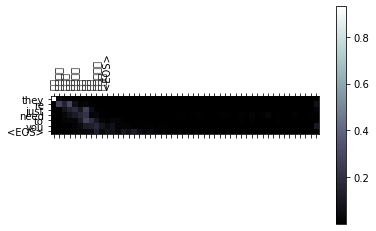

In [ ]:

evaluateAndShowAttention("वे कहते हैं कि जहाज पर आप की जरूरत है।")

# **Generating the translated sentences of the development set**

In [ ]:
with open('/content/drive/MyDrive/AssignmentNLP/week4/hindistatements.csv', newline='') as f1:                   # reading the input file (dev set) which has the hindi sentences to be translated
    reader = csv.reader(f1)
    hs = list(reader)

In [ ]:
for i in range(0,10):
  print(hs[i])

['', 'id', 'hindi']
['0', '0', 'कौन वे अपनी आस्तीन ऊपर है क्या अन्य तरकीबें जानता है?']
['1', '1', 'हम कहानियों के ज़रिये अपने ज्ञान को आगे देते हैं।']
['2', '2', 'फिर वे मुझे भी साथ लाते।']
['3', '3', '- हाँ, दुर्भाग्य से.']
['4', '4', 'मुलाक़ात नहीं हो पाई']
['5', '5', 'और जब आप इस बारे में में सोचते हैं, कि हम संयुक्त राज्य अमेरिका के आर-पार चल रहे हैं डायनामाइट और पत्थर आरी के साथ सिर्फ इसलिए की एक एल्गोरिथ्म सौदा कर सके तीन मिक्रोसेकांड्स तेज, एक संचार ढांचे के लिए जो कभी किसी इंसान को नहीं पता चलेगा, जो प्रकट भाग्य का एक प्रकार है और हमेशा एक नया मोर्चा तलाशेगा .']
['6', '6', 'मैं कभी इतना खुश या आराम से कहीं भी नहीं रहा.']
['7', '7', 'और हमने यहाँ सीखा की: अधिकतम कूड़ा एक बहुत अच्छे टैको ब्रांड से आ रहा था']
['8', '8', '♫ हम 12 अरब प्रकाश वर्ष से किनारों से दूर हैं ♫ ♫ यह एक अनुमान है ♫ ♫ कोई भी कभी नहीं कह सकता है कि यह सच है ♫ ♫, लेकिन मैं जानती हूँ कि मैं हमेशा तुम्हारे साथ रहूंगी ♫']


In [ ]:
hs_list=hs[1:]

In [ ]:
print(len(hs_list))

5000


In [ ]:
hindi_list=[]
c=0
for i in hs_list:                               # extracting each hindi sentence, along with standardizing it and dealing with out of vocabulary tokens
  s=i[2]
  s=standardize(s)
  word_list=tokenize_hindi(s)
  #word_len=len(word_list)
  s=''
  for wd in word_list:
    if wd not in hindi.word2index:
      continue
    else:
      s=s+wd+' '
  word_list=tokenize_hindi(s)
  word_len=len(word_list)
  if word_len>30:
    s=''
    for j in range(0,30):
      s=s+word_list[j]+' '
    c=c+1
  s.strip()
  hindi_list.append(s)

print(c)


238


In [ ]:
for i in range(0,10):
  print(hindi_list[i])

कौन वे अपनी आस्तीन ऊपर है क्या अन्य तरकीबें जानता है 
हम कहानियों के ज़रिये अपने ज्ञान को आगे देते हैं । 
फिर वे मुझे भी साथ लाते । 
हाँ दुर्भाग्य से 
मुलाक़ात नहीं हो पाई 
और जब आप इस बारे में में सोचते हैं कि हम संयुक्त राज्य अमेरिका के आरपार चल रहे हैं डायनामाइट और पत्थर आरी के साथ सिर्फ इसलिए की एक एल्गोरिथ्म 
मैं कभी इतना खुश या आराम से कहीं भी नहीं रहा 
और हमने यहाँ सीखा की अधिकतम कूड़ा एक बहुत अच्छे ब्रांड से आ रहा था 
♫ हम 12 अरब प्रकाश वर्ष से किनारों से दूर हैं ♫ ♫ यह एक अनुमान है ♫ ♫ कोई भी कभी नहीं कह सकता है कि यह सच है 
उन्हें गोली मार 


In [ ]:
len(hindi_list)

5000

In [ ]:
op=[] 
c1=0                                                          # this is a simple white space de-tokenizer implemented by me which is being used for processing the translated english sentence
for i in range(0,len(hindi_list)):
  sentence=hindi_list[i]
  if len(sentence)==0:
    c1=c1+1
    op.append('')
    continue
  translated=translate(encoder,decoder, sentence)
  op.append(translated.strip())                              # adding the translated sentence to the list of outputs i.e. op
print(c1)

62


In [ ]:
for i in range(0,10):
  print(op[i])

what they they what they have their own
we have to our our our
then they me me with me
yeah yeah it
no not nt
and when you re about this this that we we we we the
i m not not or or or not
and we were the the of the of a a a a of
i ca nt have a of of the of the that that is not nt that that
they did them


In [ ]:
print(len(op))

5000


In [ ]:
with open('/content/drive/MyDrive/AssignmentNLP/answer.txt', 'w') as f:                                      # creating and witing the translated english sentences to the output file
    for item in op:
        f.write("%s\n" % item)

In [ ]:
torch.save(encoder.state_dict(), '/content/drive/MyDrive/AssignmentNLP/model/ph4sub1-enc')
torch.save(decoder.state_dict(), '/content/drive/MyDrive/AssignmentNLP/model/ph4sub1-dec')


# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [ ]:
while True:pass